# Lab 1: Semantic Similarity Using WordNet

I am running Python 3.7.4.  Which version are you running?

In [1]:
!python --version

Python 3.7.4


## 1. Getting Started

If you haven't used nltk before, you will need to run the following cell and download resources.

In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic as wn_ic

## 2 Useful WN Functions

In [4]:
wn.synsets("book")

[Synset('book.n.01'),
 Synset('book.n.02'),
 Synset('record.n.05'),
 Synset('script.n.01'),
 Synset('ledger.n.01'),
 Synset('book.n.06'),
 Synset('book.n.07'),
 Synset('koran.n.01'),
 Synset('bible.n.01'),
 Synset('book.n.10'),
 Synset('book.n.11'),
 Synset('book.v.01'),
 Synset('reserve.v.04'),
 Synset('book.v.03'),
 Synset('book.v.04')]

In [5]:
wn.synsets("book", wn.NOUN)

[Synset('book.n.01'),
 Synset('book.n.02'),
 Synset('record.n.05'),
 Synset('script.n.01'),
 Synset('ledger.n.01'),
 Synset('book.n.06'),
 Synset('book.n.07'),
 Synset('koran.n.01'),
 Synset('bible.n.01'),
 Synset('book.n.10'),
 Synset('book.n.11')]

In [6]:
asynset=wn.synsets("book",wn.NOUN)[0]
asynset.definition()

'a written work or composition that has been published (printed on pages bound together)'

In [7]:
asynset.hyponyms()

[Synset('appointment_book.n.01'),
 Synset('authority.n.07'),
 Synset('bestiary.n.01'),
 Synset('booklet.n.01'),
 Synset('catalog.n.01'),
 Synset('catechism.n.02'),
 Synset('copybook.n.01'),
 Synset('curiosa.n.01'),
 Synset('formulary.n.01'),
 Synset('phrase_book.n.01'),
 Synset('playbook.n.02'),
 Synset('pop-up_book.n.01'),
 Synset('prayer_book.n.01'),
 Synset('reference_book.n.01'),
 Synset('review_copy.n.01'),
 Synset('songbook.n.01'),
 Synset('storybook.n.01'),
 Synset('textbook.n.01'),
 Synset('tome.n.01'),
 Synset('trade_book.n.01'),
 Synset('workbook.n.01'),
 Synset('yearbook.n.01')]

In [8]:
asynset.hypernyms()


[Synset('publication.n.01')]

In [9]:
asynset.path_similarity(asynset.hypernyms()[0])

0.5

# 2.1 Q1

One of many possible solutions.  The use of itertools.product and a list comprehension is just one way of getting all of the possible similarities - using a doubly nested loop is equally acceptable.

In [10]:
from itertools import product 
brown_ic=wn_ic.ic('ic-brown.dat')
def calcsim(s1,s2,metric):
    sim=None
    if metric == "path":
        sim=s1.path_similarity(s2)
    elif metric == "res":
        sim=s1.res_similarity(s2,brown_ic)
    elif metric == "lin":
        sim=s1.lin_similarity(s2,brown_ic)
        
    if isinstance(sim,float):
        return sim
    else:
        return 0

def wnsimilarity(w1,w2,metric='path'):
    synsets1=wn.synsets(w1,wn.NOUN)
    synsets2=wn.synsets(w2,wn.NOUN)
    sims=[calcsim(s1,s2,metric) for s1,s2 in product(synsets1,synsets2)]
    return max(sims)

wnsimilarity("car","chicken","path")

0.09090909090909091

## 3 Human Synonymy Judgments

### 3.1
Again, many ways to complete this one.  I would encourage the use of the csv package (either with dialect = 'excel' or the delimiter and quotechar explicitly set) to avoid future problems when reading csv files which have commas in the fields.  Pandas is a good choice here and will make the correlations easier later (but just storing a list of triples is fine too).

In [11]:
import csv, pandas as pd
filename="mcdata.csv"
with open(filename) as instream:
    mcdata=list(csv.reader(instream,dialect='excel'))


df=pd.DataFrame(mcdata,columns=["word1","word2","human similarity"])
df



,word1,word2,human similarity
0,asylum,madhouse,3.61
1,bird,cock,3.05
2,bird,crane,2.97
3,boy,lad,3.76
4,brother,monk,2.82
5,car,automobile,3.92
6,cemetery,woodland,0.95
7,chord,smile,0.13
8,coast,forest,0.42
9,coast,hill,0.87


### 3.2


In [12]:
measures=["path","res","lin"]
for measure in measures:
    scores=[]

    for i,triple in enumerate(mcdata):
        scores.append(wnsimilarity(triple[0],triple[1],metric=measure))
    df[measure]=scores
    
df

,word1,word2,human similarity,path,res,lin
0,asylum,madhouse,3.61,0.500000,9.475167,0.855584
1,bird,cock,3.05,0.500000,7.677755,0.773937
2,bird,crane,2.97,0.250000,7.677755,0.747812
3,boy,lad,3.76,0.500000,8.399492,0.830562
4,brother,monk,2.82,0.500000,9.261593,0.986407
5,car,automobile,3.92,1.000000,7.591401,1.000000
6,cemetery,woodland,0.95,0.111111,1.290026,0.123441
7,chord,smile,0.13,0.090909,2.619644,0.246256
8,coast,forest,0.42,0.166667,1.290026,0.130646
9,coast,hill,0.87,0.200000,5.884681,0.599113


### 3.3
I haven't actually asked for a scatter plot but it is always good to generate one when thinking about correlation.

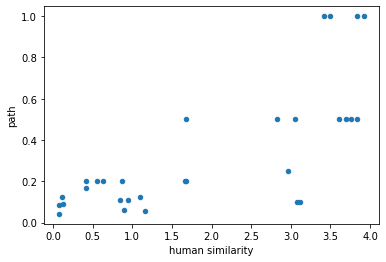

In [13]:
%matplotlib inline  
#need this somewhere so the plots are generated in the notebook

x="human similarity"
y="path"
def draw_scatter(x,y):

    df[x]=df[x].map(float)
    df[y]=df[y].map(float)
    
    df.plot.scatter(x,y)
draw_scatter(x,y)

In [14]:
df.corr(method='spearman')

,human similarity,path,res,lin
human similarity,1.000000,0.722743,0.735945,0.753510
path,0.722743,1.000000,0.900648,0.945509
res,0.735945,0.900648,1.000000,0.962707
lin,0.753510,0.945509,0.962707,1.000000


### 3.4
* Correlation is generally high / low?
* Highest correlation is between ....
* Highest correlation between a wordnet measure and human synonymy judgements is for ...
* Differences are small / large?  Are they significant?  Think about size of sample

## 4 Distributional Similarity

In [15]:
from gensim.models import KeyedVectors

In [16]:
filename="GoogleNews-vectors-negative300.bin"
mymodel =KeyedVectors.load_word2vec_format(filename,binary=True)

KeyboardInterrupt: 

In [ ]:
mymodel.similarity('man','woman')

In [ ]:
mymodel.most_similar(positive=['man'])

In [ ]:
mymodel.similarity('noon','string')

In [ ]:
mymodel['man']

## 4.1

In [ ]:
scores=[]
for i,triple in enumerate(mcdata):
    scores.append(mymodel.similarity(triple[0],triple[1]))
df["word2vec"]=scores
    
df

In [ ]:

x="human similarity"
y="word2vec"
def draw_scatter(x,y):

    df[x]=df[x].map(float)
    df[y]=df[y].map(float)
    
    df.plot.scatter(x,y)
draw_scatter(x,y)

In [ ]:
df.corr(method='spearman')

### 4.2
* Which measure has the highest correlation with human synonymy judgements now?

## 5 Extension
I don't expect many students to get onto this.   However, some might - especially if they have reused functions for wordnet similarity that they created during NLE and / or are very keen / interested in the statistical significance aspects.

First, make a scatter plot for different pairs of variables.  See above for basic example using pandas.  However, here I am going to use seaborn because it is really easy to plot the regression line.

I am just going to work through the word2vec vs human similarity case but obviously it can be done with any of the pairs of measures.


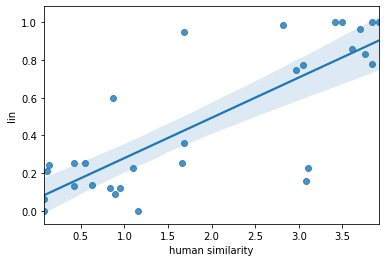

In [17]:
import seaborn as sns
x="human similarity"
y="lin"
def draw_scatter(x,y):

    df[x]=df[x].map(float)
    df[y]=df[y].map(float)
    
    sns.regplot(x=df[x],y=df[y])
draw_scatter(x,y)

Correlation coefficients with p-values can be calculated using scipy.stats (spearmanr is better than pearsonr for this type of data - why?)

In [18]:
import scipy.stats as stats
stats.spearmanr(df[x],df[y])

SpearmanrResult(correlation=0.7535104398162412, pvalue=1.537645680941842e-06)

Whilst not essential, worth knowing that you can add text to a graph by using the text() method.  Also, use the string formatting functions to sort out the number of decimal places displayed.

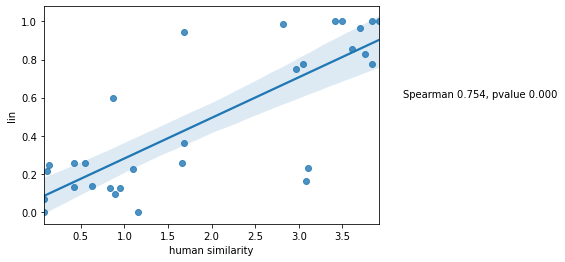

In [19]:

x="human similarity"
y="lin"
def draw_scatter(x,y):

    df[x]=df[x].map(float)
    df[y]=df[y].map(float)
    
    ax=sns.regplot(x=df[x],y=df[y])
    
    r,p=stats.spearmanr(df[x],df[y])
    ax.text(4.2, 0.6, "Spearman {:.3f}, pvalue {:.3f}".format(r,p))
draw_scatter(x,y)

The pvalue tells us the probability of getting this correlation coefficient if there was really no correlation between the two variables.  This probability is very small (<< 0.1%) so it is definitely "significant" - but that is significantly greater than zero.  It does not tell us anything about the difference between 2 correlation coefficients (is 0.786 significantly greater than 0.75?)

### 5.3

The correlation coefficient calculated with stats.lingregress() is Pearson's product-moment, but it does tell us the slope and intercept of the line of best fit.  I have also added this as text next to the graph.

In [20]:
stats.linregress(df[x],df[y])

LinregressResult(slope=0.21316693388842692, intercept=0.0671859303046985, rvalue=0.803644338083903, pvalue=8.923071661975858e-08, stderr=0.029831431858643658, intercept_stderr=0.07103495982988775)

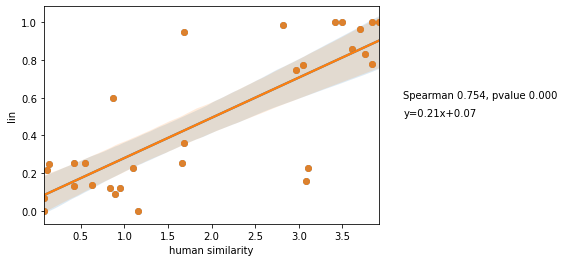

In [21]:
import seaborn as sns

def draw_scatter(x,y):

    df[x]=df[x].map(float)
    df[y]=df[y].map(float)
    
    ax=sns.regplot(x=df[x],y=df[y])
    r,p=stats.spearmanr(df[x],df[y])
    ax.text(4.2, 0.6, "Spearman {:.3f}, pvalue {:.3f}".format(r,p))
    
    (m,c,_r,_p,_s)=stats.linregress(df[x],df[y])
    text="y={:.2f}x+{:.2f}".format(m,c)
    ax.text(4.2, 0.5, text)
    
    sns.regplot(x=df[x], y=df[y])

    
draw_scatter(x,y)

### 5.4  basic bootstrapping
Here, I use numpy.random to (repeatedly) create a random sample (with replacement) of the word pairs.  I then look up the appropriate similarity scores from the dataframe.  I calculate the correlation for each sample and store it in a list of correlations.  I sort the list and then find the appropriate percentiles in that list for the confidence interval required.

In [24]:
from numpy.random import choice
import math
n=100
repeats=1000
interval=99
indices=range(0,len(mcdata))


correlation_list=[]
for i in range(0,repeats):
    sample = choice(indices,n)    
    scores_x=[df[x][j] for j in sample]
    scores_y=[df[y][j] for j in sample]
    correlation_list.append(stats.spearmanr(scores_x,scores_y)[0])

    
sorted_list=sorted(correlation_list)
p=(100-interval)/2
index1=math.floor(p*repeats/100)
index2=repeats-index1

lower=sorted_list[index1]
upper=sorted_list[index2]

print("{}% confidence interval for Spearmanr between {} and {} y: [{:.3f},{:.3f}]".format(interval,x,y,lower, upper))


99% confidence interval for Spearmanr between human similarity and lin y: [0.633,0.838]


Even without calculating confidence intervals for the other measures, we can see that they will overlap.  Therefore, the differences between the correlation coefficients are not statistically significant at the 95% level.